# Exploratory Data Analysis of Safety Dataset

## Executive Summary

## Introduction

## About the Data

## Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Loading Using Pandas

In [2]:
# check the dataset folders
!ls data/safety/

data_dictionary.xlsx  features	labels


In [3]:
# read the data dictionary
xl = pd.ExcelFile("data/safety/data_dictionary.xlsx")

In [4]:
# sheet names
xl.sheet_names

['telematics data', 'labels']

In [5]:
# let's see the first sheet
xl.parse('telematics data').head()

,Unnamed: 0,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,description,trip id,accuracy inferred by GPS in meters,GPS bearing,accelerometer reading in x axis (m/s2),accelerometer reading in y axis (m/s2),accelerometer reading in z axis (m/s2),gyroscope reading in x axis (rad/s),gyroscope reading in y axis (rad/s),gyroscope reading in z axis (rad/s),time of the record by number of seconds,speed measured by GPS in m/s
1,samples,1,5,303.695,-0.00636292,-0.393829,-0.922379,"-0.020000606102604086,0.03205247529964867,-0.0...",NaN,NaN,0,0.57
2,NaN,1,10,325.39,0.183914,-0.355026,-0.92041,"-0.028598887998033916,0.025720543491876274,-0....",NaN,NaN,1,0.28
3,NaN,1,5,303.695,-0.00636292,-0.392944,-0.922226,"-0.01894040167264354,0.030980020328673762,-0.0...",NaN,NaN,2,0.57
4,NaN,1,10,324.23,0.165924,-0.332092,-0.920578,"-0.0577245492596855,0.002558232543130116,0.014...",NaN,NaN,3,0.28


In [6]:
# let's see the second sheet
xl.parse('labels').head()

,bookingID,label
0,1,1
1,2,0
2,3,0
3,4,0
4,5,1


In [7]:
# let's see the contents of features and labels folder
!ls data/safety/features

# there are many csvs, we either want to run this in Pyspark 
# or we can combine them into just one Pandas dataset

part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv


In [8]:
!ls data/safety/labels

part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv


In [9]:
# let's load one features csv, there are many csvs we either
_ = pd.read_csv("data/safety/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
_.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


In [10]:
# let's load the labels csv
labels = pd.read_csv("data/safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv")

# drop duplicates
labels = labels.dropna()

labels.head()

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


In [11]:
# how many null
labels.isnull().sum()

bookingID    0
label        0
dtype: int64

In [12]:
# how many labels are there?
len(labels)

20018

In [13]:
# how many unique bookings are there?
len(labels.bookingID.unique())

20000

In [14]:
# load all paths into list
paths = glob.glob("data/safety/features/*.csv")

# let's combine all feature into one pandas dataframe
df_feats = pd.DataFrame()

for path in paths:
    _ = pd.read_csv(path, header="infer")
    df_feats = pd.concat([df_feats, _])

In [15]:
df_feats.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1657857376413,10.000,128.234833,0.780280,-9.869086,-0.019440,-0.143924,-0.016662,-0.016986,497.0,16.030001
1,25769803913,6.000,286.368225,9.086713,0.309390,-3.506772,0.008518,-0.006350,0.003299,120.0,2.089626
2,1434519076946,12.136,339.000000,0.946808,9.609665,2.311615,-0.011124,-0.320435,-0.062027,76.0,5.540000
3,283467841697,3.000,186.000000,0.900247,7.996878,5.286559,0.000874,-0.009702,0.020248,22.0,0.276720
4,481036337236,3.090,18.000000,0.045000,9.882000,0.173000,0.038839,-0.284030,-0.078576,1522.0,1.306365


In [16]:
df_feats.shape

(16135561, 11)

In [17]:
# drop duplicates
df_feats = df_feats.drop_duplicates()

In [18]:
# count null values
df_feats.isnull().sum()

bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
dtype: int64

In [20]:
# left join with labels
df_feats_labels = pd.merge(df_feats, labels, how="outer", on="bookingID")

# save to CSV
save_path = "data/feats_labels.csv"
df_feats_labels.to_csv(save_path, index=False)

In [22]:
df_feats_labels.shape

(16154418, 12)

In [23]:
df_feats_labels.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,1657857376413,10.0,128.234833,0.780280,-9.869086,-0.019440,-0.143924,-0.016662,-0.016986,497.0,16.030001,0
1,1657857376413,10.0,128.288040,0.187817,-9.088657,-0.063852,-0.000822,0.150899,-0.027601,431.0,15.880000,0
2,1657857376413,10.0,315.971802,0.064899,-9.744971,0.713138,-0.014979,0.006265,-0.012791,267.0,1.570000,0
3,1657857376413,10.0,195.206451,0.115591,-8.950635,-0.126208,-0.167526,-0.018366,-0.160001,251.0,2.320000,0
4,1657857376413,10.0,78.804138,0.033496,-9.730914,0.436346,0.001044,0.002088,-0.011740,45.0,2.720000,0


In [24]:
df_feats_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16154418 entries, 0 to 16154417
Data columns (total 12 columns):
bookingID         int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
label             int64
dtypes: float64(10), int64(2)
memory usage: 1.4 GB


### Loading using Spark

In [ ]:
# # import pyspark for parallel processing of data
# # Import SparkContext from pyspark - used to connect to cluster
# from pyspark import SparkContext, SQLContext

# # Import SparkSession from pyspark.sql
# from pyspark.sql import SparkSession

# # other functions
# from pyspark.sql.functions import isnan, when, count, col

In [ ]:
# # sparkcontext
# sc = SparkContext.getOrCreate()

# # Create sparksession
# # Create spark
# spark = SparkSession.builder.getOrCreate()

In [ ]:
# # creating a spark dataframe
# feats = spark.read.csv("data/safety/features/*.csv", header=True, inferSchema=True)

# # create table named feats
# feats.createOrReplaceTempView("feats")

# # check that the type is a dataframe
# type(feats)

In [ ]:
# # showing the first 5 items
# feats.show(5)

In [ ]:
# # showing the columns
# feats.columns

In [ ]:
# # counting how many rows
# query = "SELECT COUNT(*) FROM feats"
# spark.sql(query).show()

In [ ]:
# # counting the number of unique booking IDs
# query = "SELECT COUNT(DISTINCT(bookingID)) FROM feats"
# spark.sql(query).show()

In [ ]:
# # counting number of null values per column
# feats.select([count(when(isnan(c), c)).alias(c) for c in feats.columns]).show()

In [ ]:
# # load labels
# # creating a spark dataframe
# labels = spark.read.csv("data/safety/labels/*.csv", header=True, inferSchema=True)

# # create table named feats
# labels.createOrReplaceTempView("labels")

# type(labels)

In [ ]:
# # showing the first 5 items
# labels.show(5)

In [ ]:
# # counting how many rows
# query = "SELECT COUNT(*) FROM labels"
# spark.sql(query).show()

In [ ]:
# # counting the number of unique rows
# query = """SELECT COUNT(*) FROM (SELECT bookingID, label, COUNT(*) as count FROM labels
#             GROUP BY bookingID, label
#             HAVING COUNT(*) = 1)"""
# spark.sql(query).show()

In [ ]:
# # counting the number of unique booking IDs
# query = "SELECT COUNT(DISTINCT(bookingID)) FROM labels"
# spark.sql(query).show()

In [ ]:
# # counting number of null values per column
# labels.select([count(when(isnan(c), c)).alias(c) for c in labels.columns]).show()

In [ ]:
# # How do we handle the 18 others?
# # We retain the first entry, drop the duplicates
# labels2 = labels.dropDuplicates(subset=["bookingID"])

# # create table named feats
# labels2.createOrReplaceTempView("labels")

In [ ]:
# # counting the number of unique rows with duplicates dropped
# query = """SELECT COUNT(*) FROM (SELECT bookingID, label, COUNT(*) as count FROM labels
#             GROUP BY bookingID, label
#             HAVING COUNT(*) = 1)"""
# spark.sql(query).show()

In [ ]:
# # Merge the features and labels datasets by bookingID
# query = """SELECT feats.bookingID, feats.Accuracy 
#             FROM feats
#             LEFT JOIN labels ON labels.bookingID = feats.bookingID"""
# spark.sql(query).show()

In [ ]:
# # Merge the features and labels datasets by bookingID

# # Join the DataFrames
# flights_with_airports = flights.join(airports, on="dest", how="leftouter")

## EDA

In [3]:
# load saved combined dataset
save_path = "data/feats_labels.csv"
df_feats_labels0 = pd.read_csv(save_path)
df_feats_labels0.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,1657857376413,10.0,128.234833,0.780280,-9.869086,-0.019440,-0.143924,-0.016662,-0.016986,497.0,16.030001,0
1,1657857376413,10.0,128.288040,0.187817,-9.088657,-0.063852,-0.000822,0.150899,-0.027601,431.0,15.880000,0
2,1657857376413,10.0,315.971802,0.064899,-9.744971,0.713138,-0.014979,0.006265,-0.012791,267.0,1.570000,0
3,1657857376413,10.0,195.206451,0.115591,-8.950635,-0.126208,-0.167526,-0.018366,-0.160001,251.0,2.320000,0
4,1657857376413,10.0,78.804138,0.033496,-9.730914,0.436346,0.001044,0.002088,-0.011740,45.0,2.720000,0


In [4]:
# drop bookingID
df_feats_labels = df_feats_labels0.drop("bookingID", axis=1)
df_feats_labels.head()

,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,10.0,128.234833,0.780280,-9.869086,-0.019440,-0.143924,-0.016662,-0.016986,497.0,16.030001,0
1,10.0,128.288040,0.187817,-9.088657,-0.063852,-0.000822,0.150899,-0.027601,431.0,15.880000,0
2,10.0,315.971802,0.064899,-9.744971,0.713138,-0.014979,0.006265,-0.012791,267.0,1.570000,0
3,10.0,195.206451,0.115591,-8.950635,-0.126208,-0.167526,-0.018366,-0.160001,251.0,2.320000,0
4,10.0,78.804138,0.033496,-9.730914,0.436346,0.001044,0.002088,-0.011740,45.0,2.720000,0


In [5]:
feature_cols = ["Accuracy", "Bearing", "acceleration_x", "acceleration_y", "acceleration_z",
       "gyro_x", "gyro_y", "gyro_z", "second", "Speed"]
df_feats = df_feats_labels[feature_cols]
basic_stats = df_feats.describe().T
basic_stats

,count,mean,std,min,25%,50%,75%,max
Accuracy,16154418.0,11.607443,8.686924e+01,0.750000,3.900000,4.255000,8.000000,6.070101e+03
Bearing,16154418.0,168.977125,1.072962e+02,0.000000,78.000000,168.962120,263.000000,3.599995e+02
acceleration_x,16154418.0,0.069311,1.423701e+00,-78.419685,-0.507825,0.061600,0.635379,6.687346e+01
acceleration_y,16154418.0,4.464359,8.132821e+00,-72.994119,-2.113992,9.081207,9.709685,7.505589e+01
acceleration_z,16154418.0,0.892730,3.252890e+00,-78.448420,-0.933767,0.774093,2.749072,7.805576e+01
gyro_x,16154418.0,-0.001713,1.445047e-01,-48.455750,-0.026783,-0.000644,0.023300,3.983975e+01
gyro_y,16154418.0,0.000266,3.398832e-01,-74.888610,-0.029947,0.000262,0.031418,8.031496e+01
gyro_z,16154418.0,-0.000254,1.480109e-01,-53.554450,-0.018759,-0.000035,0.018234,6.630078e+01
second,16154418.0,3799.904859,1.435848e+06,0.000000,241.000000,520.000000,863.000000,1.495797e+09
Speed,16154418.0,9.006626,8.106292e+00,-2.000000,1.020000,7.530000,15.480000,1.480186e+02


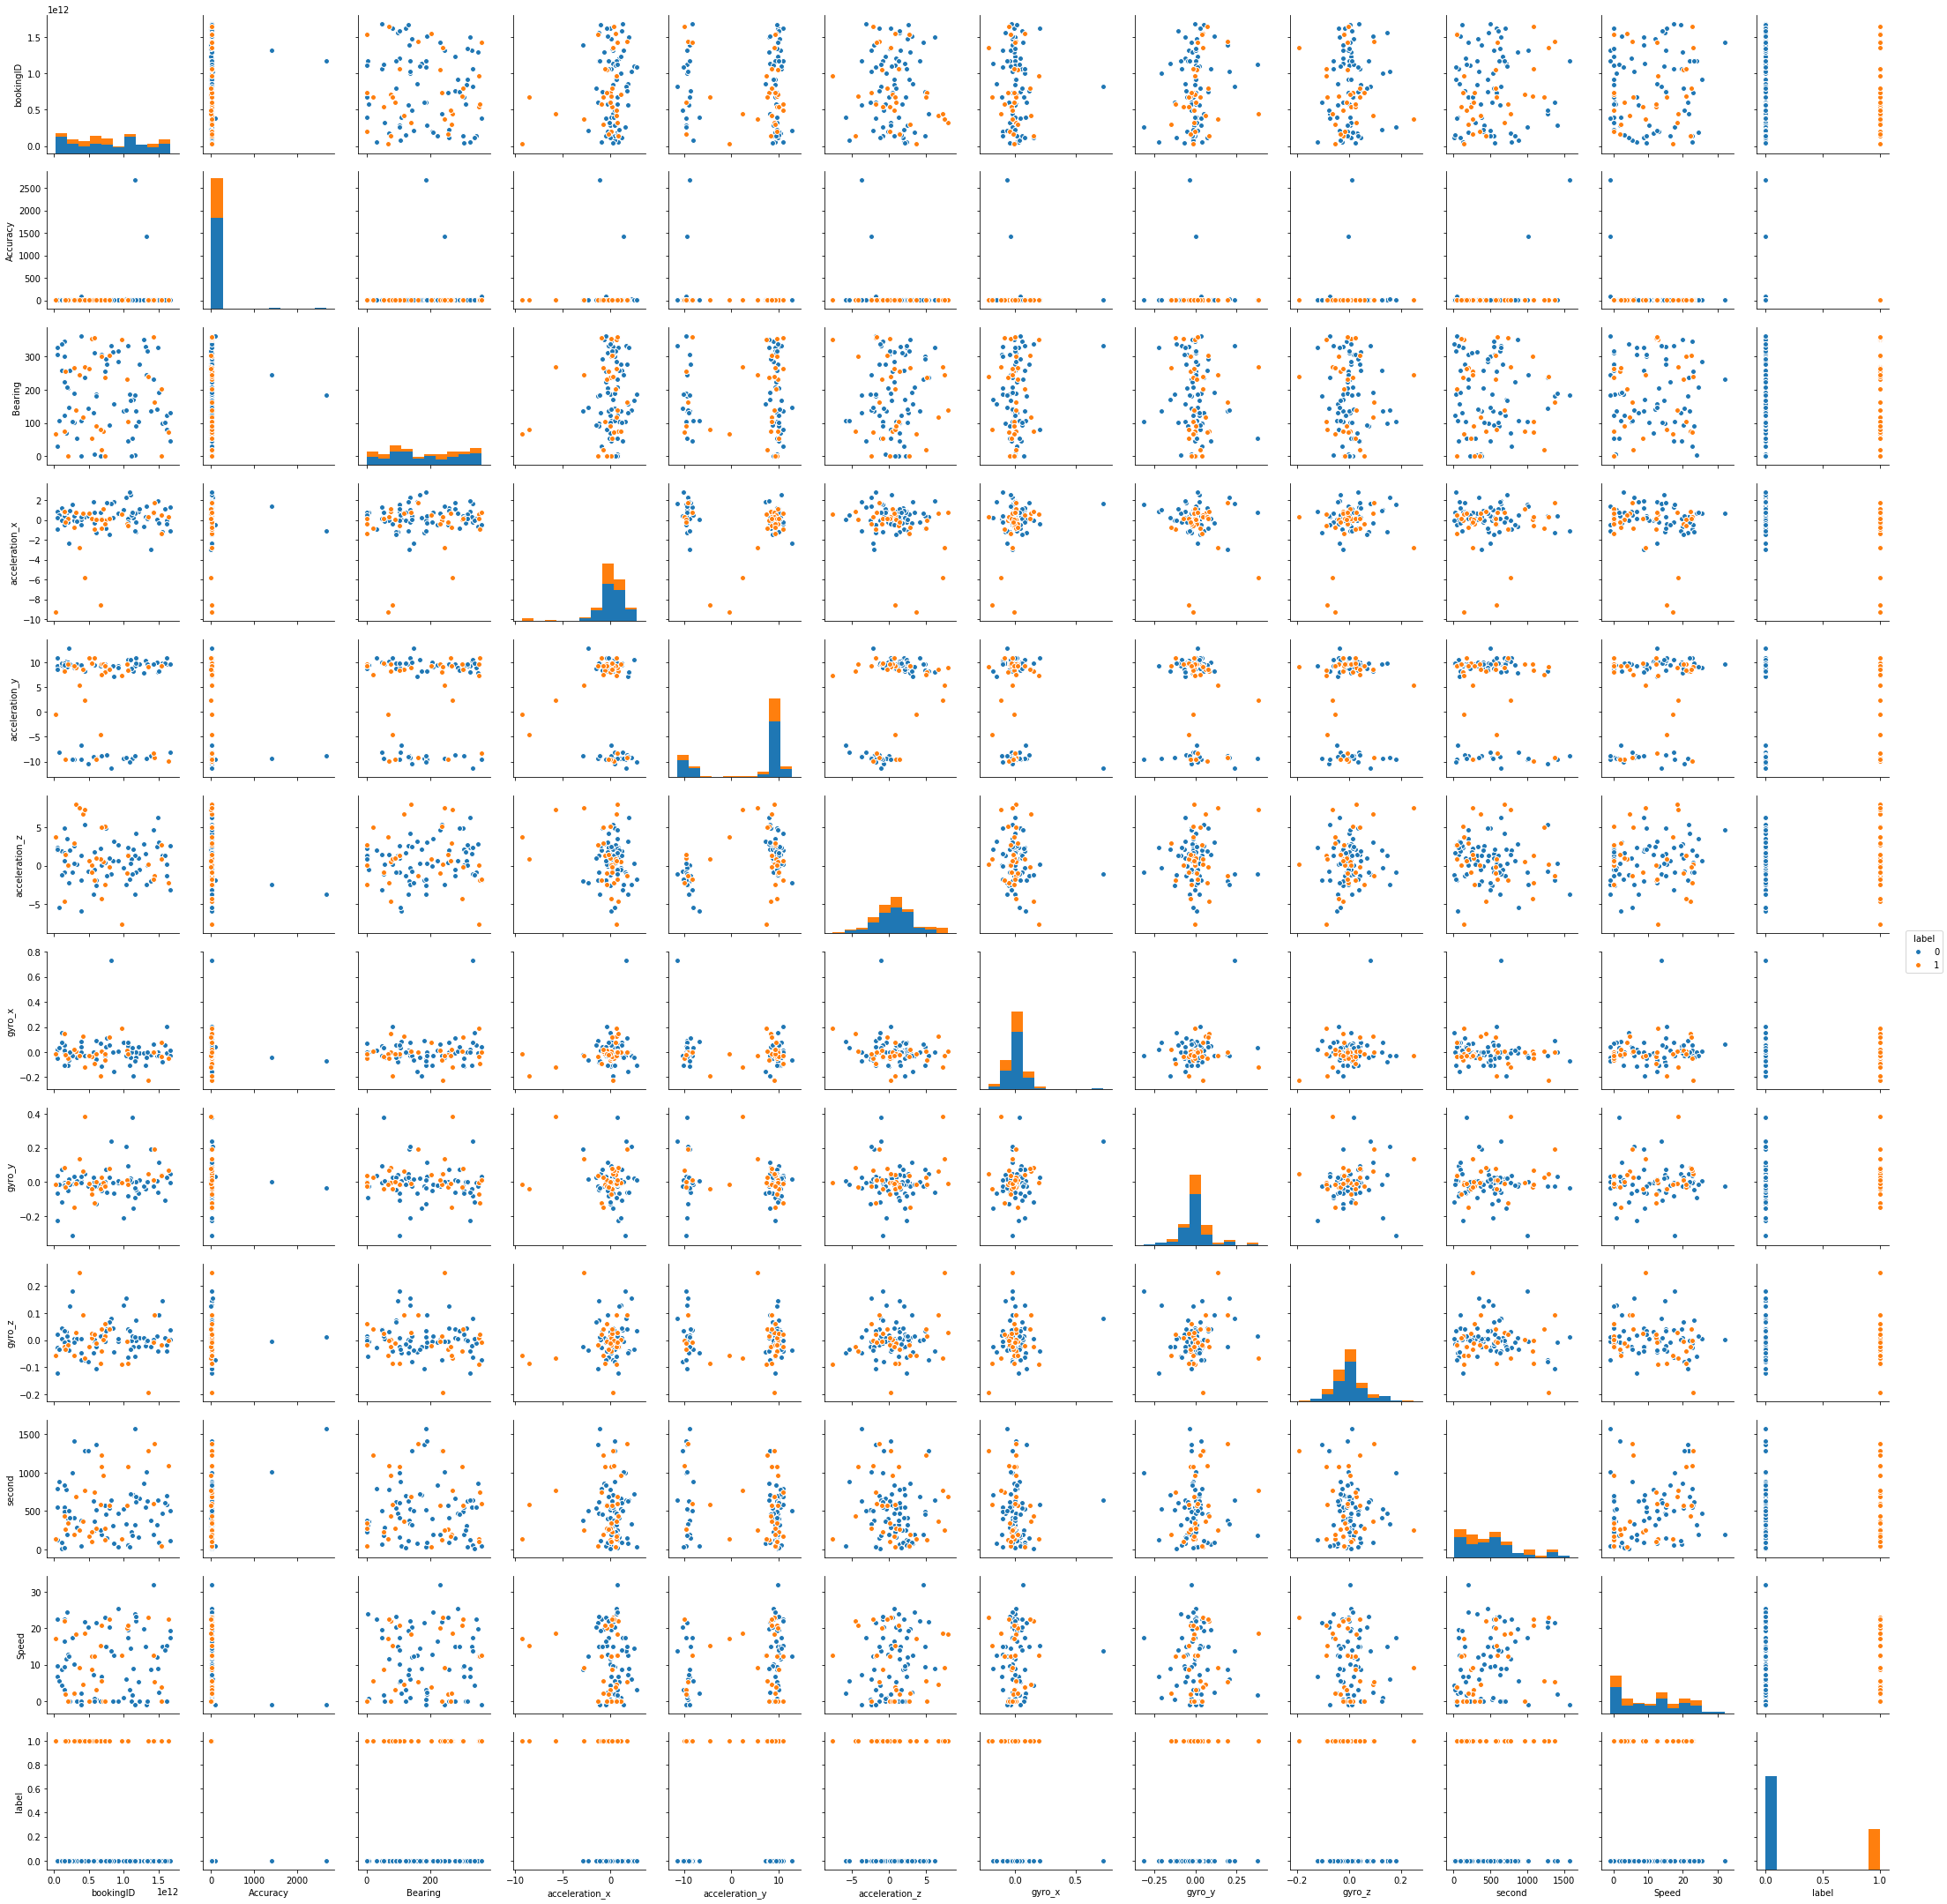

In [19]:
# we look at scatterplots between the features using a sample of 100 points
df_sample = df_feats_labels.sample(n=100)
sns.pairplot(df_sample, hue='label')

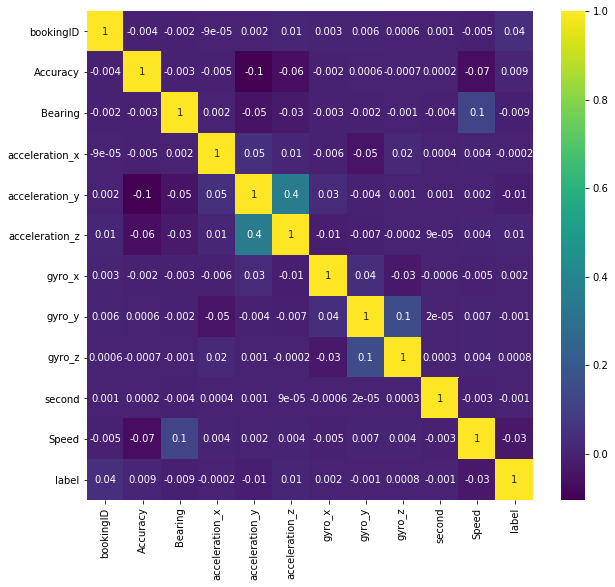

In [20]:
# we look at the correlations between the features using a covariance matrix
plt.figure(figsize=(10, 9))

df_corr_matrix = pd.DataFrame(np.corrcoef(df_feats_labels.values.T), 
                              index=df_feats_labels.columns, columns=df_feats_labels.columns)
sns.heatmap(df_corr_matrix, annot=True, fmt='0.1g', cmap="viridis")

In [ ]:
# boxplots
plt.semilogy()
sns.boxplot(x="label", y="Accuracy", data=df_feats_labels)
plt.show()

In [ ]:
# boxplots
data = df_feats_labels

sns.distplot()
plt.show()

In [7]:
from collections import Counter

Counter({0: 11215547, 1: 4938871})


Text(0, 0.5, 'counts')

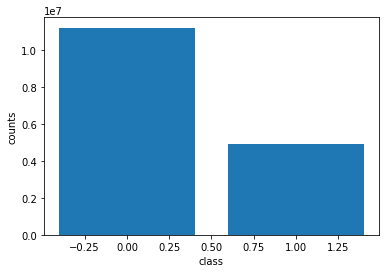

In [16]:
# number of samples per class
print(Counter(df_feats_labels.label))
y = Counter(df_feats_labels.label).values()
x = Counter(df_feats_labels.label).keys()

plt.bar(x, y)
plt.xlabel("class")
plt.ylabel("counts")

## Preprocessing

In [22]:
from sklearn.utils import shuffle

In [23]:
# equalizing the number of classes
# getting number of samples for class 1 (lower)
df_labels_1 = df_feats_labels[df_feats_labels.label == 1]
num_per_class = len(df_labels_1)
print(num_per_class)

# getting a sample for class 0
df_labels_0 = df_feats_labels[df_feats_labels.label == 1].sample(n=num_per_class, replace=False)
print(len(df_labels_0))

4938871
4938871


In [30]:
# concatenate and shuffle
np.random.seed(42)
df_for_ml = shuffle(pd.concat([df_labels_1, df_labels_0])).reset_index(drop=True)

# shape
df_for_ml.shape

(9877742, 11)

In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mmsc = MinMaxScaler()
stdsc = StandardScaler()

In [ ]:
# train-test splitting
from sklearn.model_selection import train_test_split

columns = ['mnth', 'temp', 'hum', 'windspeed', 'count']
df_tt = df[columns]
X = df_tt.drop('count', axis=1)
y = df_tt['count']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

## Accuracy to Beat - PCC

In [ ]:
# proportional chance criterion
state_counts = Counter(target)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
num = (df_state[0] / df_state[0].sum())**2
self.pcc = 1.25 * num.sum()

## Machine Learning Models

In [ ]:
# loading packages
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [ ]:
# knn regressor
param_grid = {'n_neighbors':range(2, 15)}
knr = KNeighborsRegressor()
reg = GridSearchCV(knr, param_grid = param_grid, return_train_score=True)
reg.fit(X_train, y_train)
results = pd.DataFrame(reg.cv_results_)
params = results.param_n_neighbors
train_score = results.mean_train_score
test_score = results.mean_test_score
plt.plot(params, train_score)
plt.plot(params, test_score)
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")

best_param_knn_reg = reg.best_params_
best_accuracy_knn_reg = reg.best_score_

print("Best accuracy:",best_accuracy_knn_reg)
print("Best parameter:",best_param_knn_reg)

## Neural Networks